# Metadata

* Title: **Final Project Report**
* Class: DS 5100
* Date: 2022.07.13
* Student Name: Chunru Zheng
* Student Net ID: cz8yb
* This URL: <https://github.com/Chunru1995/FinalProject_Repo/blob/main/FinalProjectSubmissionTemplate.ipynb>
* GitHub Repo URL: https://github.com/Chunru1995/FinalProject_Repo

# The Monte Carlo Module

In [ ]:
# A code block with your classes.

import numpy as np
import pandas as pd
import operator as op

class Die: 
    ''' 
    This class is to draw a die with a list of “faces”, and W weights, and can be rolled to select a face. 
    '''
    n_rolls = 1
    
    def __init__(self, arrays):
        self.faces = arrays
        self.weights = [1]* len(self.faces)
        self.my_probs = [i/sum(self.weights) for i in self.weights]
        self.die = pd.DataFrame({
            'face': self.faces,
            'weights': self.my_probs
        })      
          
    '''This returns the new frame of die and weights'''
    def change_weight(self, face_id, new_weight): 
        if face_id in self.faces:
            if isinstance(new_weight,(int, float)) == True:
                face_index = self.faces.index(face_id)
                self.weights[face_index] = new_weight
                self.my_probs = [i/sum(self.weights) for i in self.weights]
                self.die = pd.DataFrame({
                     'face': self.faces,
                     'weights': self.my_probs
                 })
            else: 
                print("invalid weight")
        else:
            print("Out of the face range")
                      
    '''This returns the results'''
    def roll_die(self, n_rolls=1):
        results = []
        for i in range(n_rolls):
            result = self.die.face.sample(weights=self.die.weights).values[0]
            results.append(result)
        return pd.Series(results) 

    def show_current(self):
        return self.die

class Game: 
    
    ''' 
    This class is to draw m dices with n times, and return the results of drawing.    
    Here I change to setting to choose m dices as you want, which make it easier for the senarios to change the number of dices.  
    '''
    
    n_rolls = 1
    m_dices = 3
    
    def __init__(self,arrays):
        self.dieobj = arrays
        
    def play(self, n_rolls, m_dices):
        '''This returns the results of rolling m dices n times.'''
        self.n_rolls = n_rolls  
        self.m_dices = m_dices
        results_nm = []
        for i in range(self.m_dices):
            class1 = Die(self.dieobj)
            result_nm = class1.roll_die(n_rolls)
            results_nm.append(result_nm)
        self.results = pd.DataFrame(results_nm).unstack().to_frame()
        self.results = self.results.reset_index()
        self.results.columns = ['num_rolls', 'num_dices','Face_rolled']
        self.results.num_rolls += 1 
        self.results.num_dices += 1
        return self.results
  
    def show(self, Form):
        '''This transforms the results of the method play. To use this method, 'play' has to run firstly.'''
        if Form == 'N':
            return self.results.set_index(['num_rolls', 'num_dices'])
        elif Form == 'W':       
            return self.results.set_index(['num_rolls'])
        else:
            print('Invalid Option')
           
        
class Analyzer: 
    
    '''
    This class returns the analysis of results, with drawing m dices in n rolls.
    '''
      
    def __init__(self,results):
        self.dierus = results
        
    def jackpot(self):
        '''This returns the times that all dices have the same face, where only one unique face is obtained.'''
        self.group_nvals = list(self.dierus.groupby('num_rolls')['Face_rolled'].nunique())
        return op.countOf(self.group_nvals,1)
    
    def combo(self):
        '''This returns the times of each face_rolled.'''
        counts = pd.Series(self.dierus['Face_rolled']).value_counts()
        return pd.DataFrame(counts).sort_values(by=['Face_rolled'])
        
    def faceper(self):
        '''This returns the times of each face in each roll.'''
        self.counts_faceroll = self.dierus.groupby(['num_rolls', 'Face_rolled']).count()
        self.counts_faceroll.columns = ['times_rolls']
        
if __name__ == '__main__':
    test_object = ([1,2, 3])    

# Test Module

In [ ]:
import unittest
import numpy as np
import pandas as pd
import operator as op

from montecarlo import montecarlo

class MontecarloTestSuite(unittest.TestCase):
    
    def test_1_Die_initial(self): 
        '''add an array and test the initial inputs. ''' 
        class1 = montecarlo.Die(["a","b","c"])
        self.assertTrue(isinstance(class1.die,pd.DataFrame))
    
    def test_2_Die_changeweight(self): 
        ''' change the specific face_id and test the new weight.  '''
        class1 = montecarlo.Die(["a","b","c"])
        class1.change_weight("a", 3)
        expected = 3
        self.assertEqual(class1.weights[0], expected)  
        
    def test_3_Die_rolldie(self):
        ''' roll the dice for one time and check the length of the result.'''
        class1 = montecarlo.Die(['a', 'b', 'c'])
        expected = 3 
        self.assertEqual(len(class1.roll_die(3)), expected)
        
    def test_4_Game_initial(self): 
        ''' add an array and test the initial inputs. ''' 
        class2 = montecarlo.Game([1,2,3,4])
        self.assertTrue(isinstance(class2.dieobj, list))
        
    def test_5_Game_play(self): 
        '''roll the dice for three time and check the size of the result.'''
        class2 = montecarlo.Game([1,2,3,4])
        expected = 12
        self.assertEqual(len(class2.play(3, 4)), expected)

    def test_6_Game_show(self): 
        '''check whether the result is a dataframe.'''
        class2 = montecarlo.Game([1,2,3,4])
        class2.play(3,4)
        self.assertTrue(isinstance(class2.show('N'), pd.DataFrame))
        
    def test_7_Analyzer_jackpot(self):
        '''check whether the result is a value '''
        class2 = montecarlo.Game([1,2,3,4])
        class3 = montecarlo.Analyzer(class2.play(3,4))
        self.assertFalse(isinstance(class3.jackpot(), float))
        
    def test_7_Analyzer_combo(self):
        '''check whether the result is a value '''
        class2 = montecarlo.Game([1, 2, 3, 4, 5, 6])
        class3 = montecarlo.Analyzer(class2.play(3,4))
        self.assertTrue(isinstance(class3.combo(), pd.DataFrame))
      
        
    def test_8_Analyzer_faceper(self):
        '''check whether the result is a dataframe '''
        class2 = montecarlo.Game([1, 2, 3, 4, 5, 6])
        class3 = montecarlo.Analyzer(class2.play(3,4))
        r = class3.faceper()
        self.assertTrue(isinstance(class3.counts_faceroll, pd.DataFrame))
            
if __name__ == '__main__':  
    unittest.main(verbosity=3)

# Test Results

# Scenarios

Code blocks with your scenarios and their outputs. 

These should have appropriate import statements even though the code is now in the same notebook as the classes it calls. 

## Scenario 1

<BarContainer object of 2 artists>

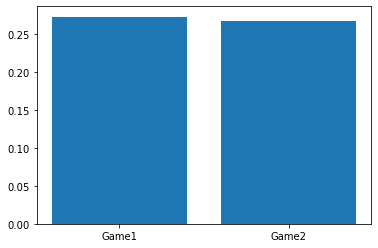

In [1]:
# Code blocks with output
import numpy as np
import pandas as pd
import operator as op
import matplotlib.pyplot as plt
from collections import Counter
import string

!cd /Users/Christine/Desktop/DS/DS5100/DS5100-2022-06-RA/FinalProject_Repo/
from montecarlo import montecarlo

# Scenario 1: A 2-headed coin
#1. Play a game of 1000 flips with 3 fair dices.
Game_class = montecarlo.Game(['H', 'T'])
Game1 = Game_class.play(1000,3)

Ana_class1 = montecarlo.Analyzer(Game1)
Jack_fre_Game1 = Ana_class1.jackpot()/1000
Jack_fre_Game1

Fair = Game_class.play(1000,1)
Die_class = montecarlo.Die(['H', 'T'])
Die_class.change_weight('H',5)
UnFair = Game_class.play(1000,2)
UnFair.num_dices += 1

Game2 = pd.concat([Fair, UnFair])
Ans_class2 = montecarlo.Analyzer(Game2)
Jack_fre_Game2 = Ans_class2.jackpot()/1000
Jack_fre_Game2

df = {'Game1':Jack_fre_Game1, 'Game2':Jack_fre_Game2}
df2 = sorted(df.items())
x, y = zip(*df2)
plt.bar(x, y)


## Scenario 2

<BarContainer object of 2 artists>

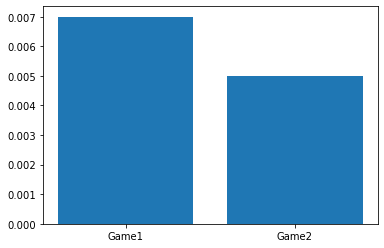

In [6]:
# Code blocks with output

# Scenario 2: A 6-sided die
#1. Play a game of 1000 flips with 5 fair dices.
Game_class = montecarlo.Game([1, 2, 3, 4, 5, 6])
Game1 = Game_class.play(10000,5)

Ans_class1 = montecarlo.Analyzer(Game1)
Jack_fre_Game1 = Ans_class1.jackpot()/1000
Jack_fre_Game1

#2. Play a game of 1000 flips with 1 fair dice and 4 unfair dices.
Fair = Game_class.play(10000,1)
Die_class = montecarlo.Die([1, 2, 3, 4, 5, 6])
Die_class.change_weight(6,5)
UnFair1 = Game_class.play(10000,2)
UnFair1.num_dices += 1

Die_class.change_weight(6,1)
Die_class.change_weight(1,5)
UnFair2 = Game_class.play(10000,2)
UnFair2.num_dices += 3

Game2 = pd.concat([Fair, UnFair1, UnFair2])
Ans_class2 = montecarlo.Analyzer(Game2)
Jack_fre_Game2 = Ans_class2.jackpot()/1000
Jack_fre_Game2

df = {'Game1':Jack_fre_Game1, 'Game2':Jack_fre_Game2}
df2 = sorted(df.items())
x, y = zip(*df2)
plt.bar(x, y)

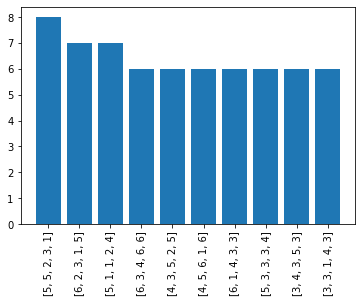

In [7]:
Game2

face_combin = []
for i in range(1,10001):
    face =[int(Game2.Face_rolled.iloc[[j-1]]) for j in range(1+5*(i-1), 6+5*(i-1))]
    face_str = str(face)
    face_combin.append(face_str)
    
most10 = pd.DataFrame(Counter(face_combin).most_common(10))
most10.columns = ['combinations', 'num']
most10    

plt.bar(most10.combinations, most10.num)
plt.xticks(rotation=90)
plt.show()

## Scenario 3

In [5]:
# Code blocks with output
# Scenario 3: Letters of the Roman Alpha
#1. Play a game of 1000 flips with 5 fair dices, 
Die_class = montecarlo.Die(list(string.ascii_uppercase))
letter_fre = {'A': 2.0720, 
              'B': 2.0720, 
'C': 4.5388, 
'D': 3.3844,
'E': 11.1607,
'F': 1.8121,
'G': 2.4705,
'H': 3.0034,
'I': 7.5448,
'J': 0.1965,
'K': 1.1016,
'L': 5.4893,
'M': 3.0129,
'N': 6.6544,
'O': 7.1635,
'P': 3.1671,
'Q': 0.1962,
'R': 7.5809,
'S': 5.7351,
'T': 6.9509,
'U': 3.6308,
'V': 1.0074,
'W': 1.2899,
'X': 0.2902,
'Y': 1.7779,
'Z': 0.2722
}

for i in letter_fre.keys():
    Die_class.change_weight(i, letter_fre.get(i))
Die_class.show_current()

Game_class = montecarlo.Game(list(string.ascii_uppercase))
Game_letter = Game_class.play(1000,5)

letter_combin = []
for i in range(1,1001):
    letter =[Game_letter.Face_rolled.iloc[[j-1]].values.tolist()[0] for j in range(1+5*(i-1), 6+5*(i-1))]
    letter_combin.append(letter)
word = ["".join(i) for i in letter_combin]

word10 = pd.DataFrame(Counter(word).most_common(10))
word10.columns = ['words', 'num']
word10

,words,num
0,JEZTO,1
1,BNTOV,1
2,JTSLW,1
3,YIGFP,1
4,RWVVL,1
5,QNHDN,1
6,ZLBQF,1
7,YJAKA,1
8,TIZDE,1
9,LFDBG,1


# Directory Listing

A code block that executes the following bash command: 

```bash
!ls -lRF -o
```

In [8]:
!ls -lRF -o

total 176
-rw-r--r--  1 Christine  30749 Jul 13 09:58 FinalProjectSubmissionTemplate.ipynb
-rw-r--r--  1 Christine   1067 Jul 11 22:22 LICENSE
-rw-r--r--  1 Christine     19 Jul 11 22:22 README.md
drwxr-xr-x  6 Christine    192 Jul 13 09:28 montecarlo/
-rw-r--r--@ 1 Christine  35751 Jul 13 09:58 montecarlo_demo.ipynb
-rw-r--r--@ 1 Christine    626 Jul 13 09:52 montecarlo_results.txt
-rw-r--r--  1 Christine   2307 Jul 13 09:52 montecarlo_tests.py
-rw-r--r--  1 Christine    260 Jul 13 09:24 setup.py

./montecarlo:
total 8
-rw-r--r--  1 Christine     0 Jul 13 09:09 __init__.py
drwxr-xr-x  4 Christine   128 Jul 13 09:31 __pycache__/
-rw-r--r--  1 Christine  3710 Jul 10 22:43 montecarlo.py

./montecarlo/__pycache__:
total 16
-rw-r--r--  1 Christine   184 Jul 13 09:28 __init__.cpython-39.pyc
-rw-r--r--  1 Christine  3734 Jul 13 09:31 montecarlo.cpython-39.pyc


# Installation Output Listing
    
A code block that executes the code to install your your package and outputs a successful installation.

In [ ]:
# Installation commands

In [9]:
!cd /Users/Christine/Desktop/DS/DS5100/DS5100-2022-06-RA/FinalProject_Repo/; pip install .

Processing /Users/Christine/Desktop/DS/DS5100/DS5100-2022-06-RA/FinalProject_Repo
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for montecarlo: filename=montecarlo-1.0-py3-none-any.whl size=3353 sha256=07a9e87de7e6eb00236037e1f4a2d62f2e663eda77c56fdfc27106c00150bb7c
  Stored in directory: /private/var/folders/n5/z1zm8jvn39b3kjy2k56p_8240000gn/T/pip-ephem-wheel-cache-f0ayky3q/wheels/4e/ca/8a/460f4fe5dc9cea009e8965650cc690c910720f9854535d2081
Successfully built montecarlo
